In [1]:
def clean_data(data):
    import pandas as pd
    import numpy as np
    
    data=pd.read_csv(data)
    print("Data shape:", data.shape)
    
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    print("Standardized data columns: ", data.columns)
    
    numerical_cols=data.select_dtypes(include=['int', 'float']).columns
    print("Numerical Columns: ", numerical_cols)
    
    categorical_cols=data.select_dtypes(include=['object']).columns
    print("Categorical Columns: ",categorical_cols)
    
    #clean data
    nulls_df=pd.DataFrame(data.isna().sum()/len(data)*100).reset_index() #formatar em tabela
    nulls_df.columns=['column_name','percent_nulls']
    
    columns_to_drop = nulls_df[nulls_df['percent_nulls']>=50]['column_name'].values
    data = data.drop(columns_to_drop, axis=1)
    
    data=data.drop_duplicates()
    
    data=data.dropna(axis=0)
    
    import warnings
    warnings.filterwarnings("ignore")

    data['effective_to_date'] = pd.to_datetime(data['effective_to_date'],errors="coerce")
    data['month'] = data['effective_to_date'].dt.month
    
    data = data[data['month'].isin([1, 2, 3])]
    
    print("Final data filtered is: ")
    
    return pd.DataFrame(data)


#test
clean_data("lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")

Data shape: (9134, 24)
Standardized data columns:  Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')
Numerical Columns:  Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')
Categorical Columns:  Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_s

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data=pd.read_csv("lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")
pd.DataFrame(data)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#describe data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


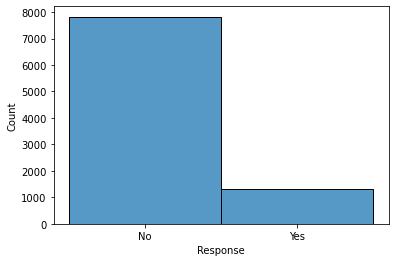

In [4]:
#plot total number of responses

sns.histplot(data["Response"],bins=2)
plt.show()

In [5]:
#plot of the response rate by the sales channel

tot_resp=data["Response"].count()
yes_resp=data['Response'].value_counts()['Yes']
percentage = yes_resp/tot_resp*100
percentage

14.320122618786948

In [6]:
sales_channels=[]
resp_rates=[]
for channel in data["Sales Channel"].unique():
    sales_channels.append(channel)
    filtered=data[(data['Sales Channel']==channel)]
    tot_resp=filtered["Response"].count()
    yes_resp=filtered['Response'].value_counts()['Yes']
    percentage = yes_resp/tot_resp*100
    resp_rates.append(percentage)

sales_channels

['Agent', 'Call Center', 'Web', 'Branch']

In [7]:
resp_rates

[19.15444348576359, 10.878186968838527, 11.773584905660377, 11.453058044409817]

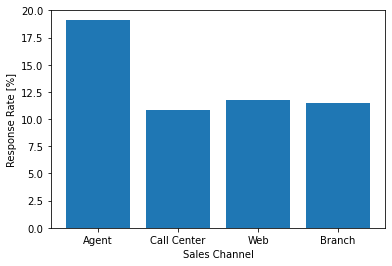

In [8]:
plt.bar(x=sales_channels, height=resp_rates)
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate [%]")
plt.ylim(0, 20)
plt.show()

In [9]:
# plot of the response rate by the total claim amount

data[["Response","Total Claim Amount"]]

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


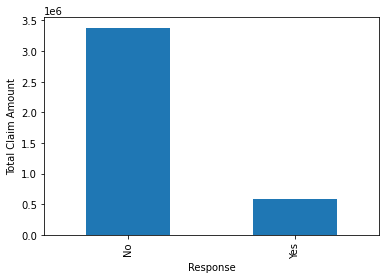

In [10]:
grouped = data.groupby("Response")["Total Claim Amount"].sum() #sum

grouped.plot(kind="bar")
plt.xlabel("Response")
plt.ylabel("Total Claim Amount")
plt.show()

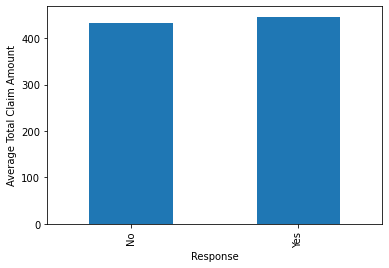

In [18]:
grouped = data.groupby("Response")["Total Claim Amount"].mean()  #average

grouped.plot(kind="bar")
plt.xlabel("Response")
plt.ylabel("Average Total Claim Amount")
plt.show()

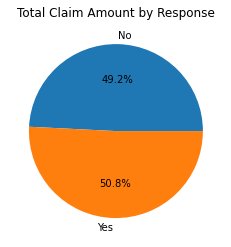

In [12]:
plt.pie(grouped, labels=grouped.index, autopct='%1.1f%%')
plt.title('Total Claim Amount by Response')
plt.show()

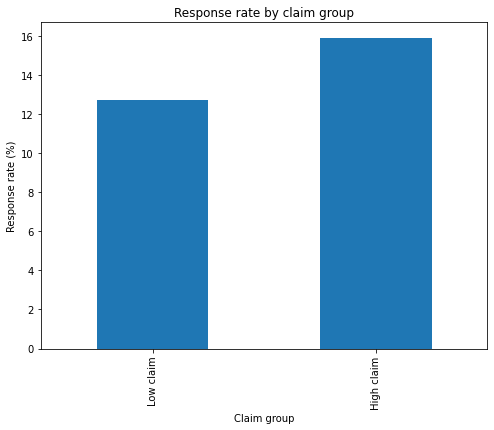

In [31]:
# Create income groups
median_income = data['Total Claim Amount'].median()
claim_bins = pd.cut(data['Total Claim Amount'], bins=[0, median_income, float('inf')], labels=['Low claim', 'High claim'])

# Calculate response rate by claim group
response_rates = data.groupby(claim_bins)['Response'].value_counts(normalize=True).loc[:, 'Yes'] * 100

# Plot the response rate by claim group
plt.figure(figsize=(8, 6))
response_rates.plot(kind='bar')
plt.title('Response rate by claim group')
plt.xlabel('Claim group')
plt.ylabel('Response rate (%)')
plt.show()

In [13]:
#plot of the response rate by income

data[["Response","Income"]]

,Response,Income
0,No,56274
1,No,0
2,No,48767
3,No,0
4,No,43836
...,...,...
9129,No,71941
9130,Yes,21604
9131,No,0
9132,No,21941


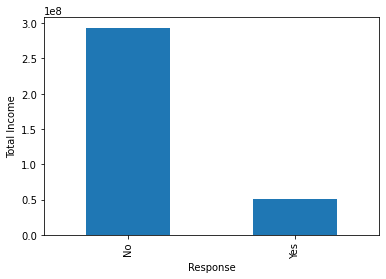

In [27]:
grouped2 = data.groupby("Response")["Income"].sum()  #sum

grouped2.plot(kind="bar")
plt.xlabel("Response")
plt.ylabel("Total Income")
plt.show()

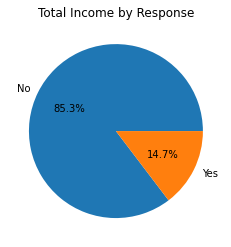

In [22]:
plt.pie(grouped2, labels=grouped.index, autopct='%1.1f%%')
plt.title('Total Income by Response')
plt.show()

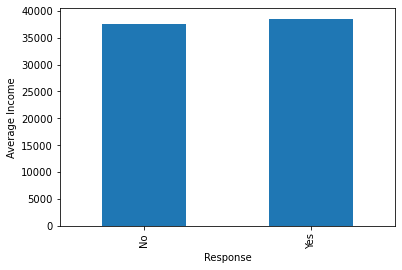

In [25]:
grouped2 = data.groupby("Response")["Income"].mean()  #average

grouped2.plot(kind="bar")
plt.xlabel("Response")
plt.ylabel("Average Income")
plt.show()

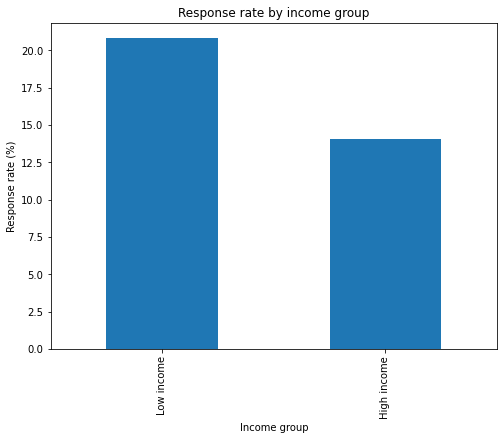

In [30]:
# Create income groups
median_income = data['Income'].median()
income_bins = pd.cut(data['Income'], bins=[0, median_income, float('inf')], labels=['Low income', 'High income'])

# Calculate response rate by income group
response_rates = data.groupby(income_bins)['Response'].value_counts(normalize=True).loc[:, 'Yes'] * 100

# Plot the response rate by income group
plt.figure(figsize=(8, 6))
response_rates.plot(kind='bar')
plt.title('Response rate by income group')
plt.xlabel('Income group')
plt.ylabel('Response rate (%)')
plt.show()